# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

**Читаем csv-файл и изучаем информацию о таблице с помощью метода info():**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('C:/real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
# привожу название столбца к более правильному
data = (
    data.rename(columns 
    = {'cityCenters_nearest' : 'city_centers_nearest'})
)

**Ознакомляемся с первыми строками таблицы:**

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Строим гистограммы для числовых столбцов таблицы и получаем числовое описание данных методом describe():**

Графики для различных метрик квартир с Яндекс Недвижимости: 


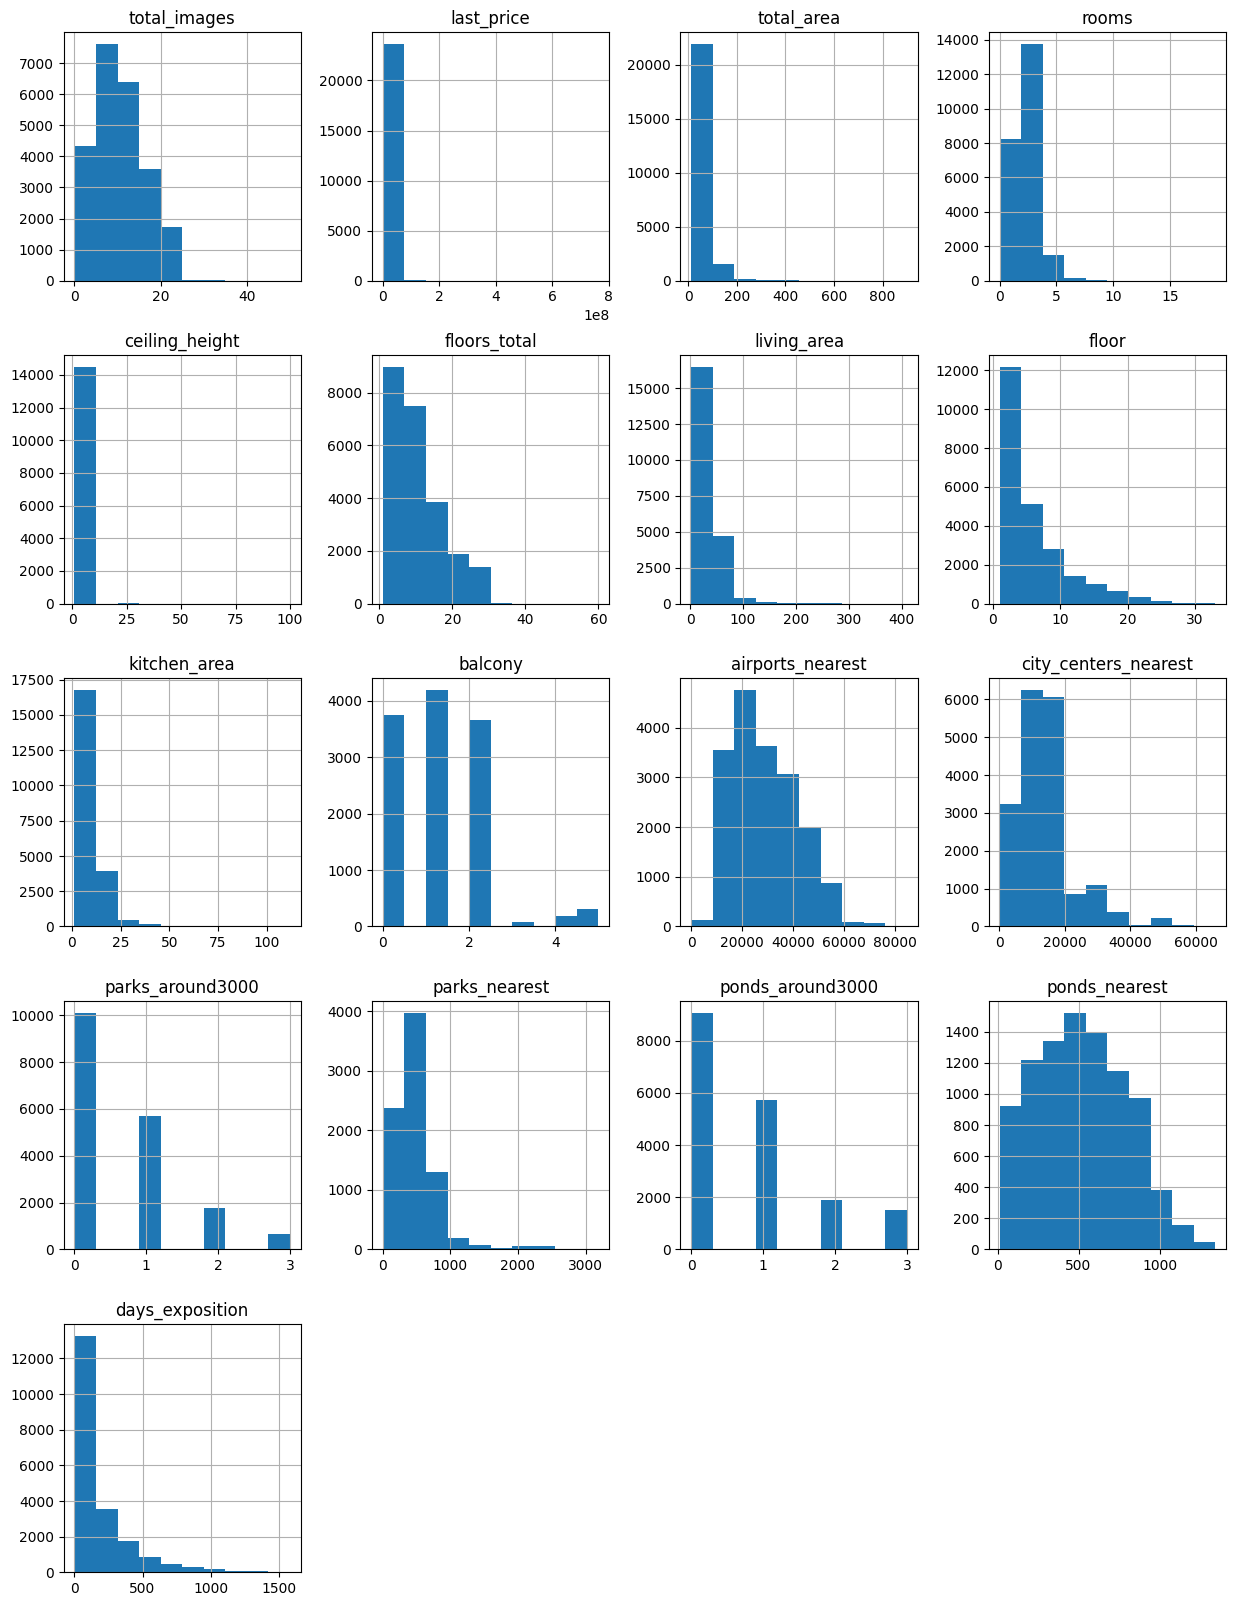

In [4]:
data.hist(figsize=(15, 20))
print('Графики для различных метрик квартир с Яндекс Недвижимости: ')

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод: В таблице много пропущенных значений, которые придется обработать. У многих столбцов неверные типы данных. По гистограммам можно сказать, что в некоторых числовых столбцах есть аномалии.**

### Выполните предобработку данных

#### Удаление пропусков

**Получим данные о количестве пропусков с помощью поочередного применения функций isna() и sum():**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Раз продавец не указал число балконов, то, скорее всего, в его квартире их нет. Заменим пропуски на 0.**

In [7]:
data['balcony'] = data['balcony'].fillna(0)

**Пропущенные значения в столбце 'floors_total' заменим, умножив этаж квартиры на медиану отношения этажа квартиры к этажности здания в остальных объявлениях.**

In [8]:
floor_to_floors_ratio = (data['floor'] / data['floors_total']).median()
data['floors_total'] = data['floors_total'].fillna(data['floor'] * floor_to_floors_ratio)

**Похожим образом поступим с 'living_area ' и 'kitchen_area': рассчитаем их пропуски из медианы отношения жилой площади и площади кухни соотвественно к общей площади квартиры. Пропуски здесь, как и во floors_total', вероятно появились потому, что владелец квартиры не оставил данных**

In [9]:
kitchen_to_total_ratio = (data['kitchen_area'] / data['total_area']).median()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_to_total_ratio)

living_to_total_ratio = (data['living_area'] / data['total_area']).median()
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_to_total_ratio)

**Эксперимент ниже доказывает, что пропуски в ponds_around3000, parks_around3000 и city_centers_nearest находятся в одних и тех же строках. К тому же их число совпадает. Исходя из этого можно утверждать, что они не значат отсутствие пруда или парка в радиусе 3000 метров. Их нельзя заменить на 0, и на что-либо еще**

In [10]:
data_experiment = data.query('ponds_around3000.isna() and parks_around3000.isna() and city_centers_nearest.isna()')
len(data_experiment)

5518

**Название населенного пункта отсутствует, но в этих же строках есть другие ценные картографические данные. Считаю не правильным удалять эти строки, данные из них могут пригодиться.**

In [11]:
data.query('locality_name.isna()').head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.800000,2,NaN,False,False,8.800000,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.600000,2,NaN,False,False,18.600000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.600000,3,NaN,False,False,10.700000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.100000,21,NaN,False,False,8.200000,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.800000,5,NaN,False,False,6.500000,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.620000,7,NaN,False,False,13.380000,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.300000,3,False,False,False,10.400000,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,NaN,7.0,47.132372,6,NaN,False,False,14.310345,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,NaN,7.0,59.100000,5,False,False,False,8.300000,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,NaN,24.0,20.000000,23,NaN,False,False,5.172414,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


**В столбце апартаментов очень много пропусков. Тип данных неправильный. False'ов намного больше, но заменить все недостающие значения на False тоже считаю не правильным, ведь есть шанс что это действительно апартаменты, просто данные по какой-то причине отсутствуют. Ко всему прочему, этот столбец никак не задействован в наших исследованиях. Стоит его удалить.**

In [12]:
print(data.groupby('is_apartment')['rooms'].count())
del data['is_apartment']


is_apartment
False    2725
True       50
Name: rooms, dtype: int64


**Пропуски в картографических данных скорее всего имеют технический характер. Количество дней размещения объявления может быть не указано из-за того, что объявление было все еще размещено на момент сбора данных. В данных о высоте потолков пропуски вероятно потому, что владелец не оставил данных. Я решил ничего с ними не делать, чтобы не искажать данные.**

**Оценим изменения количества пропусков в таблице:**

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Изменение типов данных







**Столбцы с параметрами квартир, которые измеряются в штуках, такие как: days_exposition, ponds_around3000, parks_around3000, balcony, floors_total, правильнее привести к типу int, хотя из-за пропусков это возможно сделать не со всеми из них.**




In [14]:
data['balcony'] = data['balcony'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)

**Приводим данные о дате публикации к правильному формату.**

In [15]:
data['first_day_exposition'] = (
    pd.to_datetime(data['first_day_exposition'], 
                   format='%Y-%m-%dT%H:%M:%S')
)

**Выведем информацию о таблице, чтобы убедиться, что типы данных изменились:**

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   studio                23699 non-null  bool          
 10  open_plan             23699 non-null  bool          
 11  kitchen_area          23699 non-null  float64       
 12  balcony               23699 non-null  int32         
 13  locality_name   

#### Обработка дубликатов

**В столбце с названиями населенных пунктов 'locality_name' могут быть дубликаты - избавляемся от них, обращая особое внимание на 10 населенных пунктов с наибольшим количеством объявлений, так как они будут задействованы в дальнейших исследованиях.**

In [17]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['коттеджный поселок', 'городской поселок', 
              'поселок городского типа'], 'поселок', regex=True)
    .replace('поселок Мурино', 'Мурино', regex=True)
    .replace('деревня Кудрово', 'Кудрово', regex=True)
    .replace('село Никольское', 'Никольское', regex=True)
) 
most_frequent_localities = data.pivot_table(index='locality_name', values='rooms', aggfunc='count') \
.sort_values('rooms', ascending=False)
most_frequent_localities.head(20)

,rooms
locality_name,
Санкт-Петербург,15721
Мурино,590
Кудрово,472
поселок Шушары,440
Всеволожск,398
Пушкин,369
Колпино,338
поселок Парголово,327
Гатчина,307


**Ищем названия 20 первых по частоте локаций в общем списке с помощью поиска ctrl+F, чтобы точно не пропустить дубликаты.**

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'д

**Проверяем, есть ли дубликаты строк таблицы - объявлений.**

In [19]:
data.duplicated().sum()

0

#### Обработка аномальных значений

**Изучим столбец цены на момент снятия публикации. Квартиры дороже 100 000 000 рублей могут быть реальны, но они слишком уникальные для нашего алгоритма определения рыночной стоимости недвижимости. Вряд ли их цену устанавливали исходя лишь из привычных нам критериев, таких как общая площадь или удаленность от центра. К тому же это может быть обычная ошибка в данных. Уберем объявления с слишком высокой и низкой стоимостью.**

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

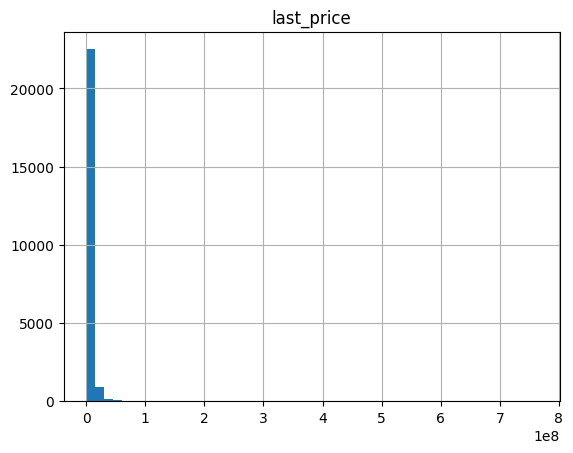

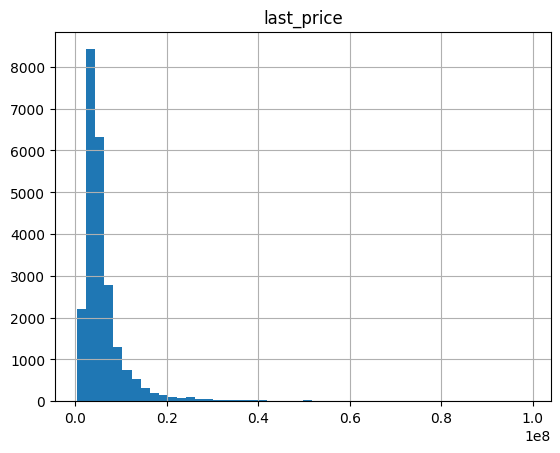

In [20]:
data.hist('last_price', bins=50)
# можно внимательно рассмотреть топовые значения так:
#data['last_price'].sort_values(ascending=False).head(50)
#но это заняло бы слишком много места в отчете
better_data = data.query('400000 <= last_price <= 100000000')
better_data.hist('last_price', bins=50)

**Общая площадь квартиры не часто бывает больше 300 метров. Убираем такие значения, просто чтобы они не искажали выводы, к тому же это могут быть ложные данные.**


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

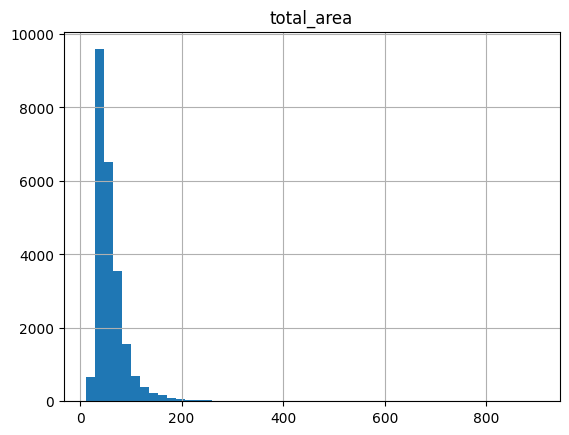

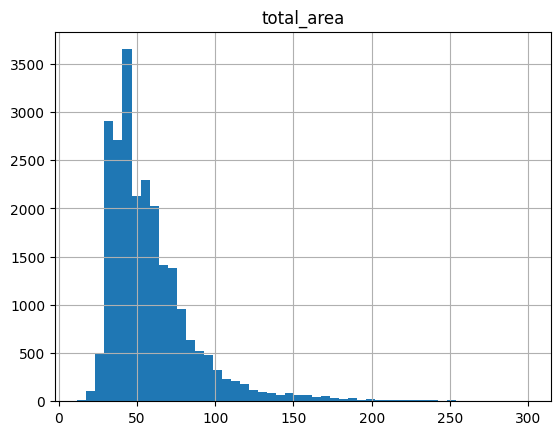

In [21]:
data.hist('total_area', bins=50)
better_data = better_data.query('total_area <= 300')
better_data.hist('total_area', bins=50)

**Стомость квартир, в которых более 10 комнат, будет сложно рассчитывать с помощью нашего универсального алгоритма, лучше их убрать, к тому же это может быть ошибка в данных. Также не понятно что из себя представляют 0-комнатные квартиры. Даже в студиях, апартаментах, открытых планировках должна быть комната.**

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

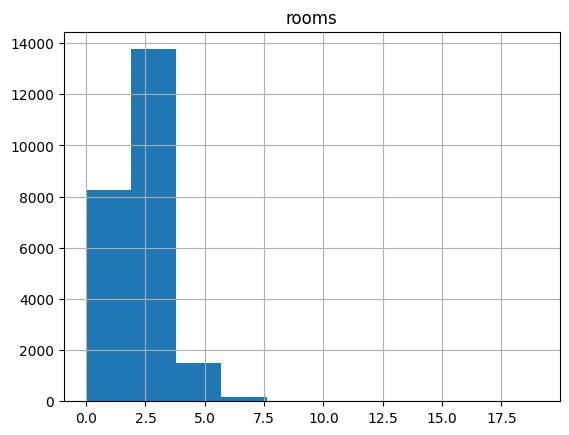

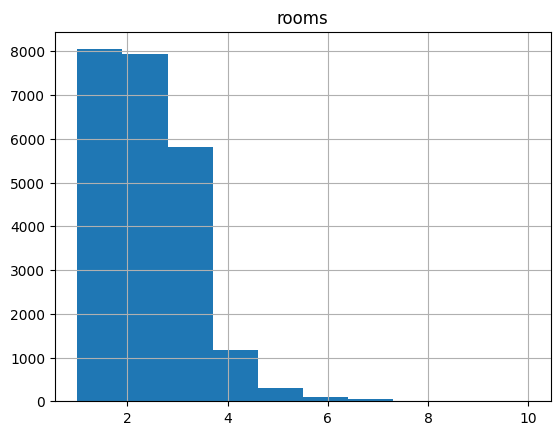

In [22]:
data.hist('rooms')
better_data = better_data.query('0 < rooms <= 10')
better_data.hist('rooms')

**Возможно, все те потолки, высота которых больше 23 метров на самом деле имеют высоту 2.3+ метра? Исправим их значения, разделив на 10. Затем удалим объявления о квартирах с потолками ниже 2.4 метра и потолками 5 метров и выше.**

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

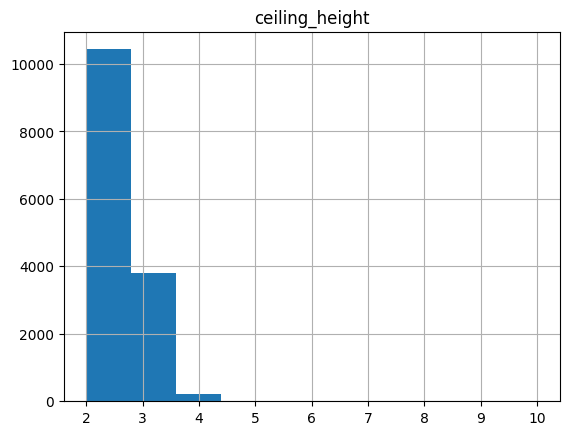

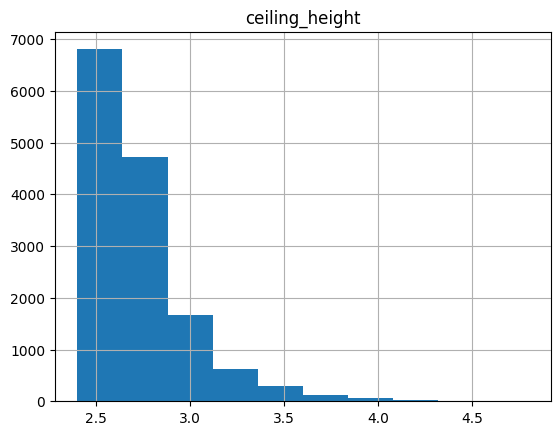

In [23]:
data.hist('ceiling_height', range=(2, 10))
#мастерское использование where, чтобы оставить те
#потолки, которые ниже 23м, а остальные поделить на 10
better_data['ceiling_height'] = (
    better_data['ceiling_height']
    .where(better_data['ceiling_height'] < 23, 
           better_data['ceiling_height'] / 10)
)
better_data = better_data.query('2.4 <= ceiling_height < 5')
better_data.hist('ceiling_height')

**Этаж квартиры не может быть выше этажности здания. Сумма площади кухни и жилой площади не может быть меньше общей площади. Убираем все те строки, где эти условия не соблюдаются.**

In [24]:
better_data = better_data.query('floor <= floors_total')
better_data = better_data.query('kitchen_area + living_area <= total_area')

**По описанию ячеек таблицы убедимся, что обработка аномальных значений в столбцах изменила таблицу:**

In [25]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.654753,34.578214,5.892358,10.491431,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.596496,22.340665,4.885249,6.029020,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод: мы обработали в таблице те пропуски, от которых можно было избавиться без вреда для исследования. Изменили на корректный тип данных в тех столбцах, где возможно. Избавились от дубликатов. Обработали аномальные значения.**

### Добавьте в таблицу новые столбцы

**Добавление столбца с ценой одного квадратного метра:**

In [26]:
better_data['price_per_meter'] = round(better_data['last_price'] / better_data['total_area'], 2)

**Добавление столбцов с днем, месяцем и годом публикации объявления:**

In [27]:
better_data['weekday'] = better_data['first_day_exposition'].dt.weekday
better_data['month'] = better_data['first_day_exposition'].dt.month
better_data['year'] = better_data['first_day_exposition'].dt.year

**Добавление столбца с типом этажа квартиры:**

In [28]:
def categorize_floor(row):
    
    """
Приветствую ревьюера!
Возвращает категорию этажа в зависимости от его отношения к общей этажности 
здания, используя правила:
- 'первый' если... этаж первый
- 'последний' если номер этажа равен числу этажей в доме
- 'другой' во всех остальных случаях
"""
    floor = row['floor']
    floors = row['floors_total']
    
    if floor == 1:
        return 'первый'
    
    elif floor == floors:
        return 'последний'
    
    else:
        return 'другой'
    
better_data['floor_type'] = better_data.apply(categorize_floor, axis=1)

**Добавление столбца с расстоянием до центра города в километрах:**

In [29]:
better_data['city_centers_nearest_km'] = round(better_data['city_centers_nearest'] / 1000)

In [30]:
better_data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,False,False,8.5,0,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0,127525.25,3,11,2017,другой,14.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,False,False,5.2,1,Петергоф,37868.0,33058.0,1.0,294.0,3.0,298.0,366.0,82943.93,5,7,2017,последний,33.0
16,11,6700000.0,82.0,2017-11-23,3,3.05,5,55.6,1,False,False,9.0,0,Санкт-Петербург,22108.0,10698.0,3.0,420.0,0.0,NaN,397.0,81707.32,3,11,2017,первый,11.0
18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,False,False,5.6,1,Санкт-Петербург,44060.0,10842.0,1.0,759.0,0.0,NaN,168.0,104838.71,4,1,2017,другой,11.0
19,16,14200000.0,121.0,2019-01-09,3,2.75,16,76.0,8,False,False,12.0,0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0,117355.37,2,1,2019,другой,13.0
20,12,6120000.0,80.0,2017-09-28,3,2.70,27,48.0,11,False,False,12.0,2,поселок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0,76500.00,3,9,2017,другой,19.0
22,20,5000000.0,58.0,2017-04-24,2,2.75,25,30.0,15,False,False,11.0,2,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0,86206.90,0,4,2017,другой,NaN


**Вывод: в таблицу были добавлены столбцы, которые в дальнейшем пригодятся для проведения исследования.**

### Проведите исследовательский анализ данных

#### Изучение некоторых параметров объектов

**Тип этажа:**

In [31]:
better_data.groupby('floor_type')['rooms'].count()

floor_type
другой       10426
первый        1790
последний     2049
Name: rooms, dtype: int64

**Общее количество этажей в доме:**

count    14265.000000
mean        10.157378
std          6.179633
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64


2253     60
16731    52
16934    37
11079    36
5807     36
397      36
4855     35
18218    35
21809    35
7236     35
Name: floors_total, dtype: int32

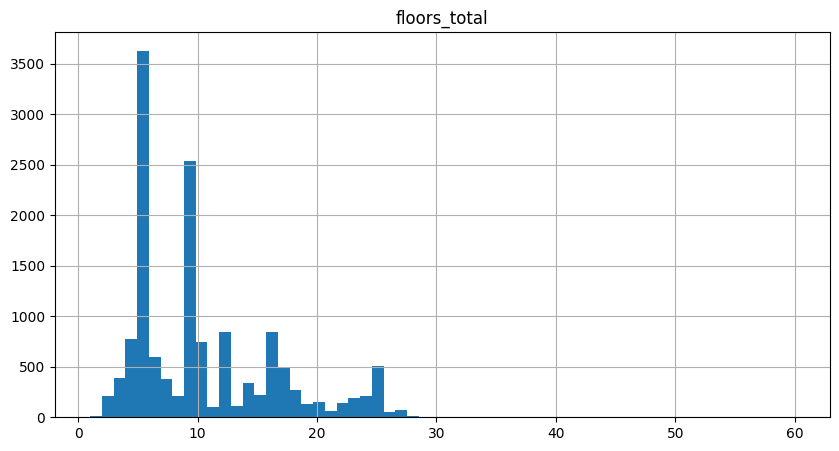

In [32]:
better_data.hist('floors_total', bins=60, figsize =(10, 5)) 
print(better_data['floors_total'].describe())
data['floors_total'].sort_values(ascending=False).head(10) # самые большие значения

**Расстояние до центра города в метрах:**

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

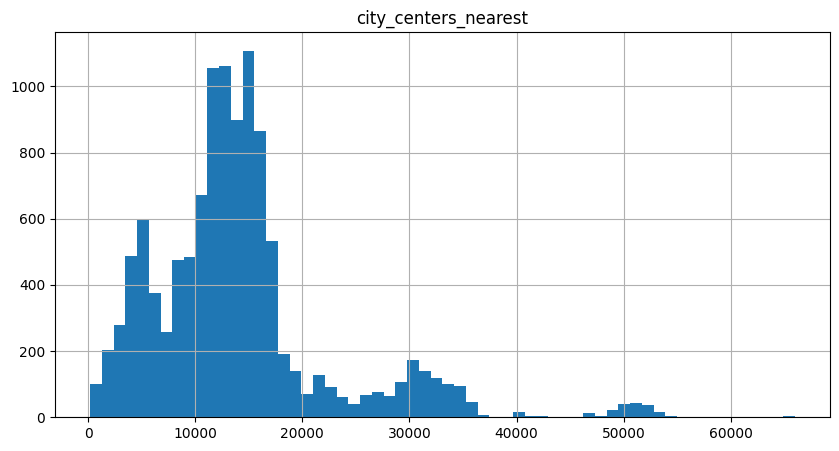

In [33]:
better_data.hist('city_centers_nearest', bins=60, figsize =(10, 5))

**Расстояние до ближайшего парка:**

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

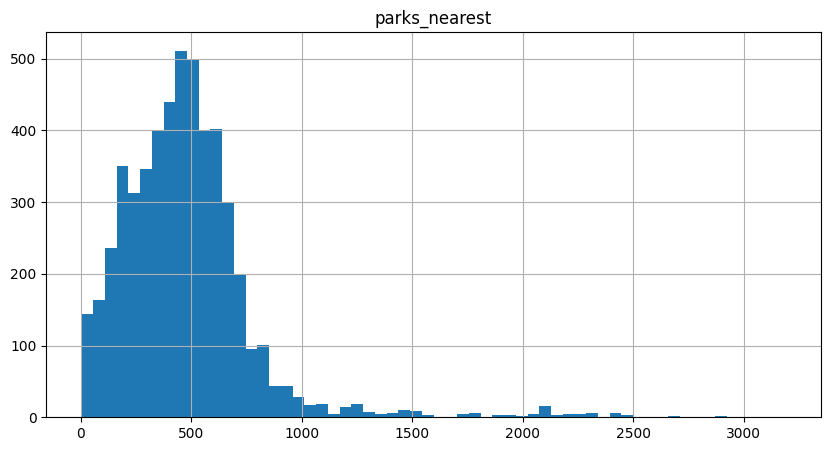

In [34]:
better_data.hist('parks_nearest', bins=60, figsize =(10, 5))

**Вывод: первых и последних этажей меньше чем остальных.** 

**В Питере очень много 5-и и 9-и этажных домов, продается квартира на 60-ом этаже, не берусь судить, есть ли такое на самом деле, или это ошибочные данные.** 

**Основная масса продающихся квартир находится на расстоянии от 10 до 20 км от центра.**

**У большинства квартир есть хотя бы 1 пруд на расстоянии менее 1 км.**

#### Изучение скорости продажи квартир

Средняя скорость продаж: 190.32
Медианная скорость продаж: 103.00


count    11848.000000
mean       190.315834
std        228.435709
min          1.000000
25%         45.000000
50%        103.000000
75%        247.000000
max       1580.000000
Name: days_exposition, dtype: float64

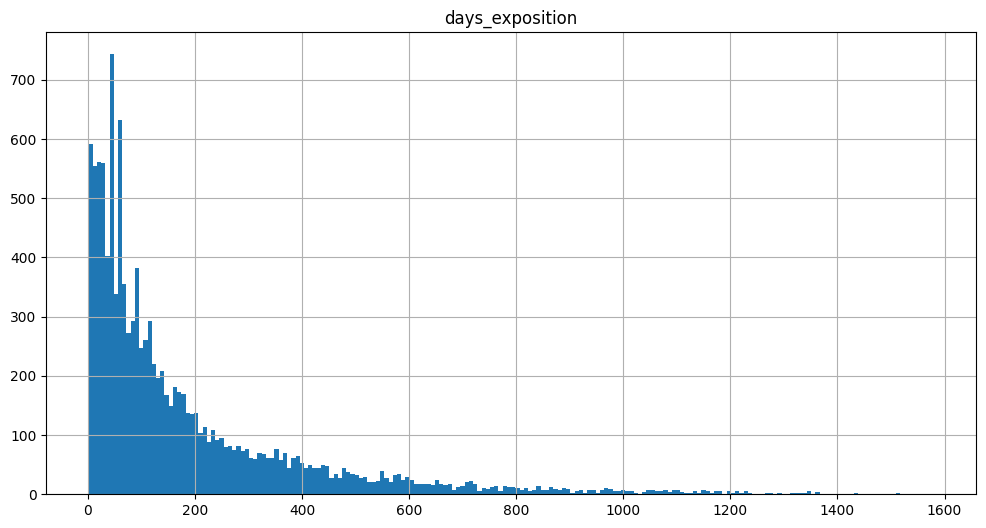

In [35]:
better_data.hist('days_exposition', bins=200, figsize=(12, 6))
exposition_days_mean = better_data['days_exposition'].mean()
exposition_days_median = better_data['days_exposition'].median()
print(f'Средняя скорость продаж: {exposition_days_mean:.2f}')
print(f'Медианная скорость продаж: {exposition_days_median:.2f}')
better_data['days_exposition'].describe()

**На графике видны высокие значения на 7, 30, 45, 60 и 90 днях.Они могут говорить не о том, что квартира была продана, а лишь означать что объявление автоматически снимается с сайта при достижении определенного срока. В таком случае возможно, хозяин продал квартиру быстрее и просто забыл снять объявление, а может объявление автоматически снялось и ему снова пришлось его выставлять.**

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

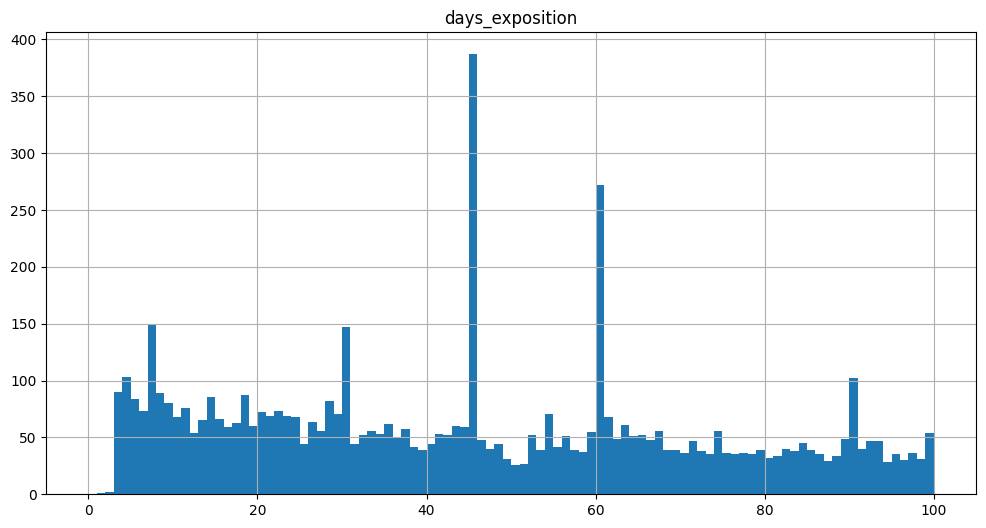

In [36]:
better_data.hist('days_exposition', bins=100, range=(0, 100), figsize=(12, 6))

**Вывод: обычно продажа квартиры занимает около 100 дней. Быстрой можно считать продажу, которая совершилась за 45 дней или быстрее. Необычно долгими можно считать продажи которые заняли более 600 дней.**

#### Определение факторов, которые больше влияют на стоимость объекта

**На графике влияния общей площади на стоимость квартиры хорошо видна положительная корреляция. Коэффициент Пирсона 0.76 говорит о довольно сильной связи между этими показателями.**

**На графике влияния жилой площади на стоимость квартиры корреляция чуть менее заметна. Коэффициент Пирсона 0.67 - связь между жилплощадью и и стоимостью есть, но не так сильна как в случае с общей площадью.**

**На графике влияния площади кухни на стоимость квартиры корреляция еще слабее. Коэффициент Пирсона 0.6 говорит о наличии связи, однако не слишком сильной.**

0.7633323825906125

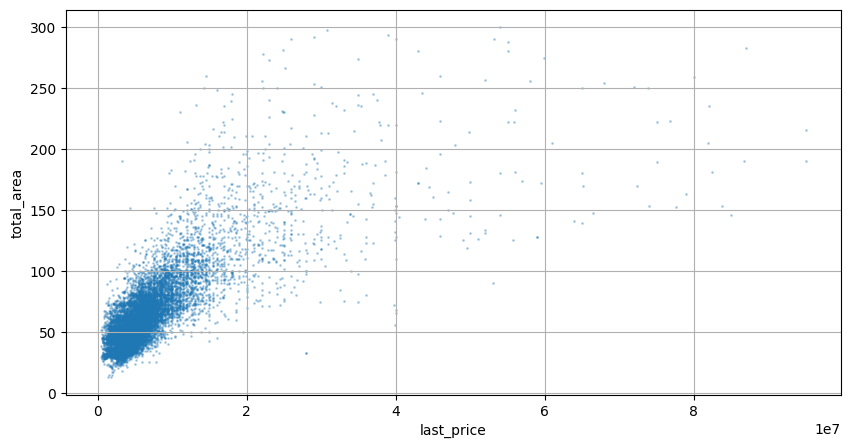

In [37]:
better_data.plot(x='last_price', y='total_area', s = 1, kind='scatter', grid=True, figsize=(10, 5), alpha=0.3)
better_data['last_price'].corr(better_data['total_area'])

0.671139217859769

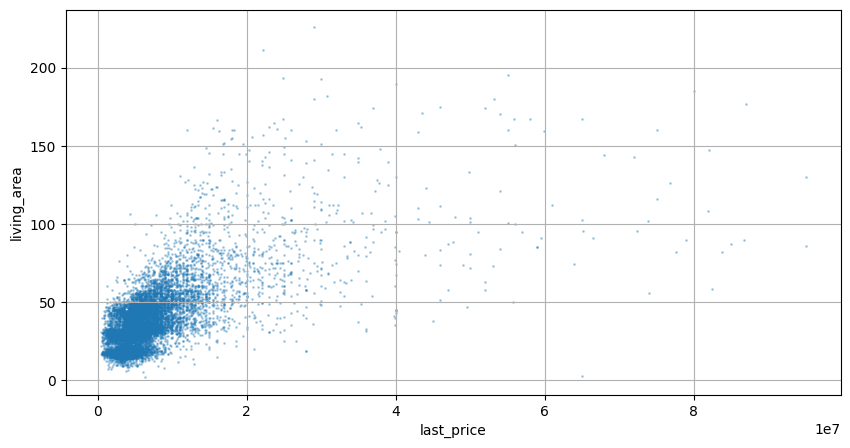

In [38]:
better_data.plot(x='last_price', y='living_area', s = 1, kind='scatter', grid=True, figsize=(10, 5), alpha=0.3)
better_data['last_price'].corr(better_data['living_area'])

0.5966732713037204

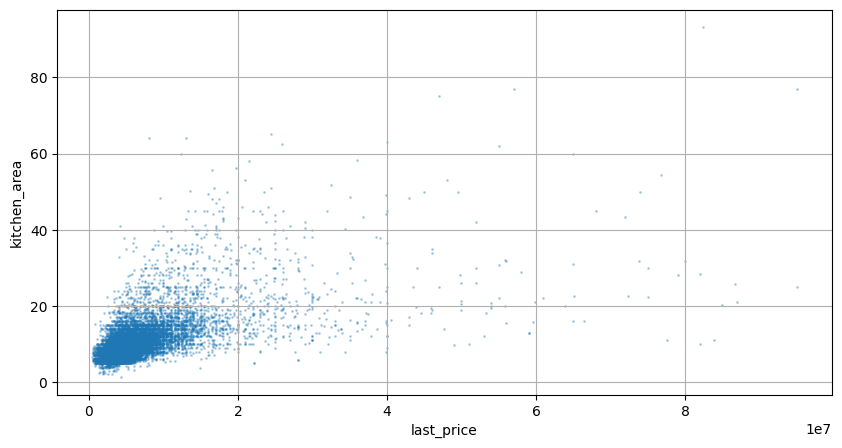

In [39]:
better_data.plot(x='last_price', y='kitchen_area', s = 1, kind='scatter', grid=True, figsize=(10, 5), alpha=0.3)
better_data['last_price'].corr(better_data['kitchen_area'])

**По графику 'rooms_impact' хорошо видно как количество комнат влияет на среднюю цену, там где их меньше 8. Квартиры с 7-10 комнатами в среднем стоят примерно одинаково.**

<AxesSubplot:xlabel='rooms'>

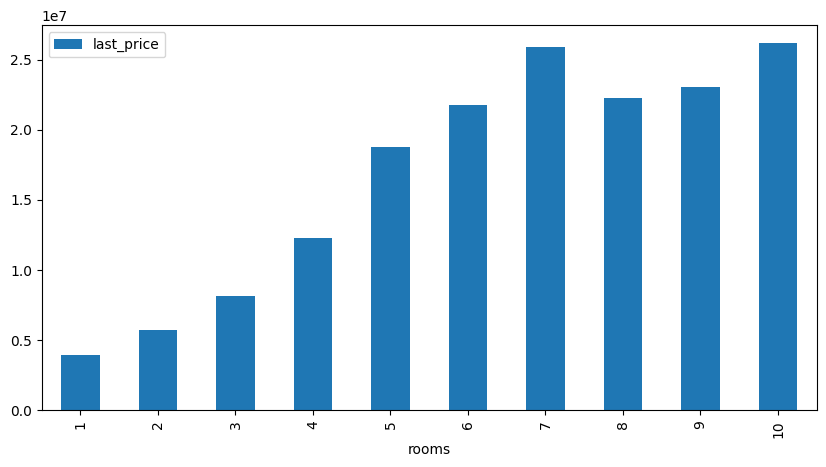

In [40]:
rooms_impact = better_data.pivot_table(index='rooms', values='last_price')
rooms_impact.plot(kind='bar', figsize=(10, 5))

**Квартиры на первом этаже в среднем на 25% дешевле квартир на последнем, и на 27% дешевле квартир на других этажах. График это подтверждает.**

0.272852860747398


0.2459020363285066

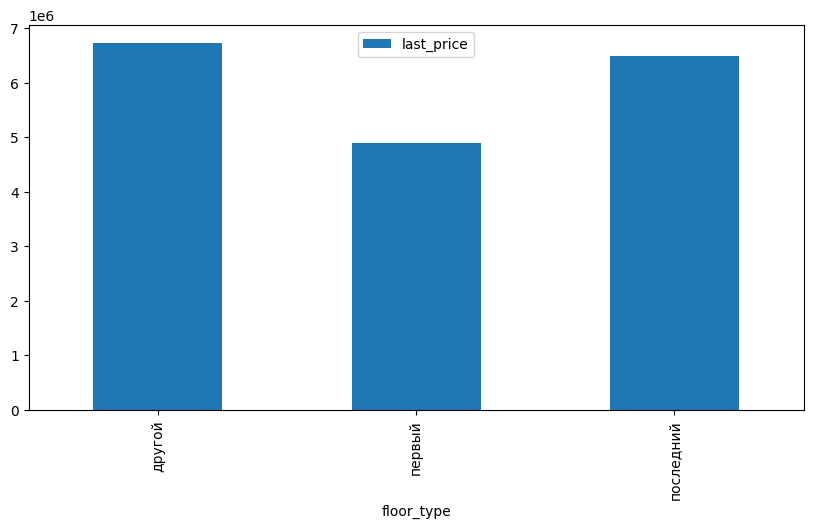

In [41]:
floor_type_impact = better_data.pivot_table(index='floor_type', values='last_price')
floor_type_impact.plot(kind='bar', figsize=(10, 5))
#вывожу на экран на сколько дешевле кв на 1 этаже чем на других
print( 1 - better_data.query('floor_type == "первый"')['last_price'].mean() / \
better_data.query('floor_type == "другой"')['last_price'].mean()) 
#считаю на сколько дешевле кв на 1 этаже чем на последнем
1 - better_data.query('floor_type == "первый"')['last_price'].mean() / \
better_data.query('floor_type == "последний"')['last_price'].mean()

**Как ни странно, день недели размещения объявления не особо влияет на стоимость объекта, разве что в субботу люди несколько "добрее", чем в другие дни.**

**В первом и последнем месяце квартиры в среднем чуть дороже, чем в остальные.**

**Средняя стоимость квартир в 2014 была значительно выше, чем в другие годы. Возможно, это связано с политическими событиями, или с малым количеством объявлений в Яндекс Недвижимости. В 2015 квартиры так же были чуть дороже, чем в последующие годы.**

<AxesSubplot:title={'center':'стоимость квартир по неделям'}, xlabel='weekday'>

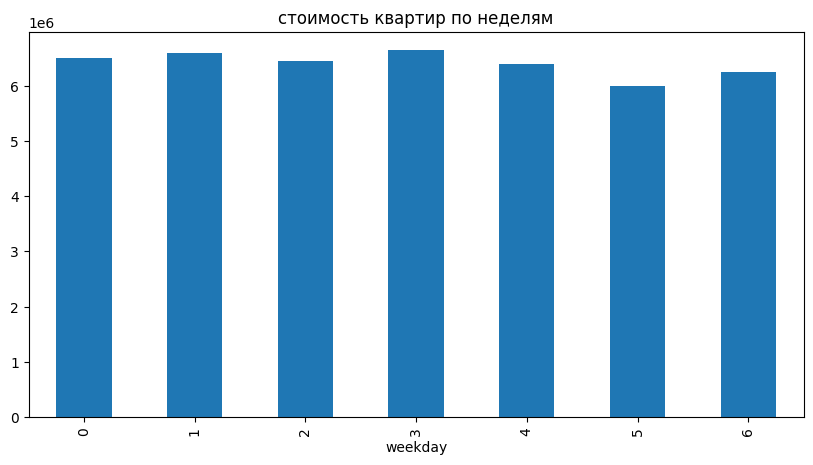

In [42]:
weekday_impact = better_data.pivot_table(index='weekday', values='last_price')
weekday_impact.plot(kind='bar', figsize=(10, 5), legend=False, title = 'стоимость квартир по неделям')

<AxesSubplot:title={'center':'стоимость квартир по месяцам'}, xlabel='month'>

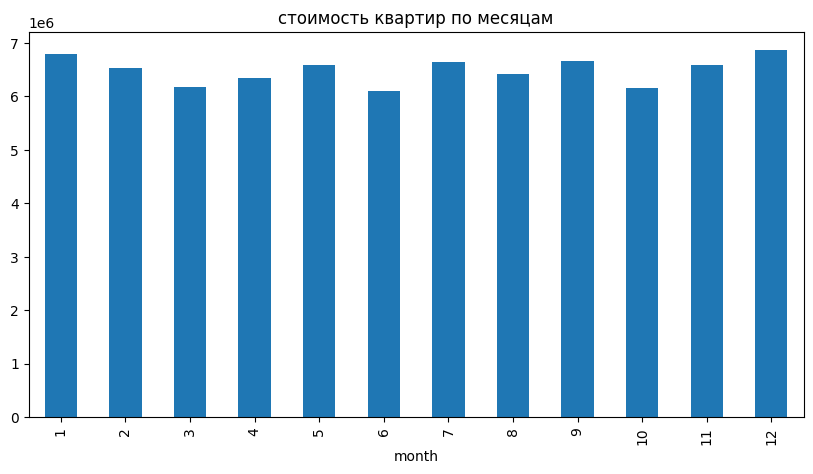

In [43]:
month_impact = better_data.pivot_table(index='month', values='last_price')
month_impact.plot(kind='bar', figsize=(10, 5), legend=False, title = 'стоимость квартир по месяцам')

73

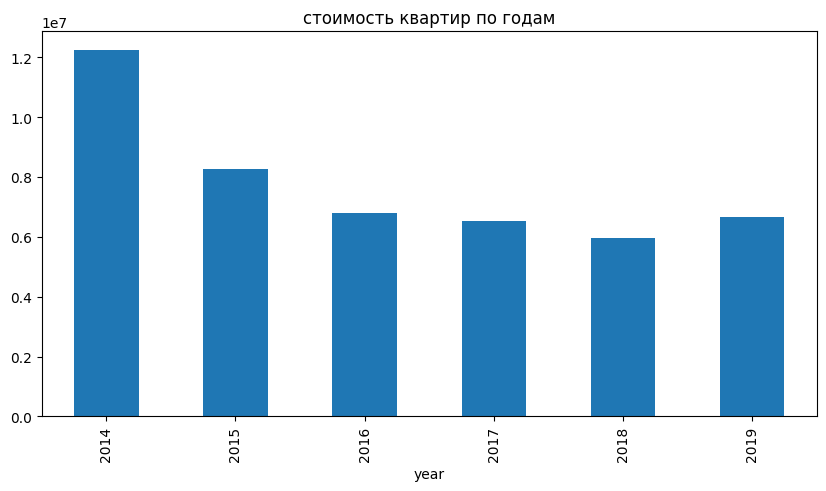

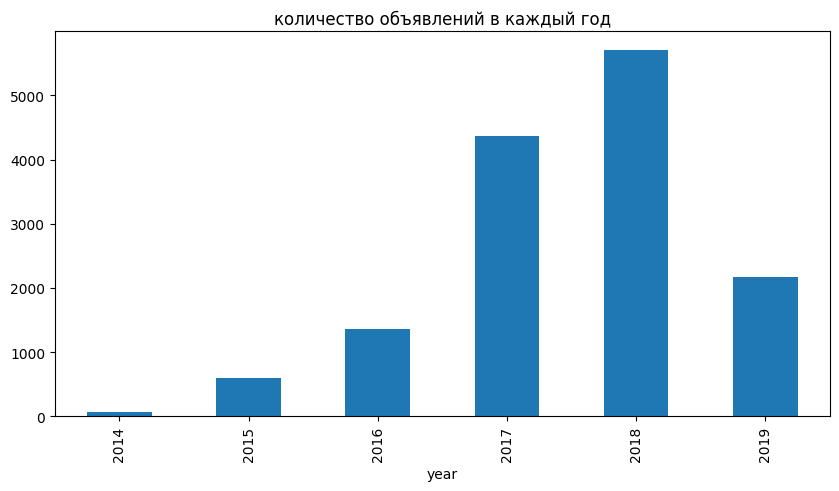

In [44]:
year_impact = better_data.pivot_table(index='year', values='last_price')
year_impact.plot(kind='bar', figsize=(10, 5), legend=False, title = 'стоимость квартир по годам')  # график с средней ценой по годам
year_count = better_data.pivot_table(index='year', values='last_price', aggfunc='count')
year_count.plot(kind='bar', figsize=(10, 5), legend=False, title = 'количество объявлений в каждый год')  # график с количеством объявлений по годам
better_data.query('year == 2014')['rooms'].count()

**Вывод: больше всего на стоимость объекта влияют такие факторы как общая площадь и количество комнат(до 7).**

#### Рассчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [45]:
#создаю сводную таблицу по нас пунктам, считаю кол-во объявлений и среднюю цену кв
best_data = better_data.pivot_table(index = 'locality_name', values = 'price_per_meter',  aggfunc = ['count', 'mean'])
#переименовываю столбцы, затем округляю до копеек цену
best_data.columns = ['count', 'mean_price_pm']
best_data['mean_price_pm'] = round(best_data['mean_price_pm'], 2)
#оставляю топ 10 строк по кол-ву объявлений, затем сортирую по сред цене за кв м
best_data = best_data.sort_values('count', ascending=False).head(10)
best_data = best_data.sort_values('mean_price_pm', ascending=False)
best_data

,count,mean_price_pm
locality_name,,
Санкт-Петербург,9933,114213.46
Пушкин,234,103920.49
Кудрово,187,95902.94
поселок Парголово,137,90901.35
Мурино,220,87420.92
Петергоф,145,85554.14
поселок Шушары,214,79239.18
Колпино,202,76034.44
Гатчина,146,69893.18


**Вывод: по сводной таблице 'best_data' видно, что из 10 населенных пунктов с наибольшим числом объявлений - в СПБ самая высокая стоимость квадратного метра, а во Всеволжске - самая низкая.**

 #### Вычисление средней стоимости квартир в Санкт-Петербурге на разном удалении от центра

**По таблице 'price_to_distance' видно, что чем дальше квартира от центра - тем она дешевле.**

In [46]:
very_best_data = better_data.query('locality_name == "Санкт-Петербург"')
price_to_distance = very_best_data.pivot_table(index = 'city_centers_nearest_km', values = 'last_price')
price_to_distance.style.format({'last_price': '{:.2f}'})

,last_price
city_centers_nearest_km,
0.0,21522294.12
1.0,15343753.96
2.0,15319075.49
3.0,10574610.30
4.0,11949765.64
5.0,12599499.06
6.0,12881122.06
7.0,13710459.28
8.0,9678958.36


<AxesSubplot:xlabel='city_centers_nearest_km'>

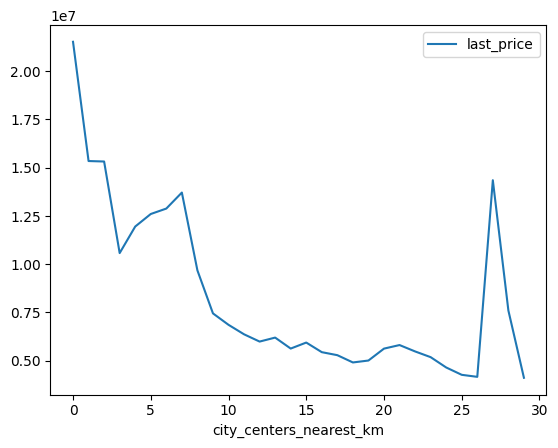

In [47]:
price_to_distance.plot()

In [48]:
distance_to_count = very_best_data.pivot_table(index = 'city_centers_nearest_km', values = 'last_price', aggfunc='count')
distance_to_count

,last_price
city_centers_nearest_km,
0.0,17
1.0,126
2.0,213
3.0,233
4.0,445
5.0,564
6.0,359
7.0,258
8.0,391


**Вывод: Как видим из таблицы 'distance_to_count', объявлений о продаже квартир, расположенных на дистанции 24-29 км от центра города слишком мало, чтобы делать выводы о их цене. В остальном график показывает что чем квартира ближе к центру - тем она дороже. Удаленность от центра очень влияет на цену объекта.**

### Напишите общий вывод

Для проведения исследования были обработаны пропуски, изменнен тип данных на корректный, удалены дубликаты, обработаны аномальные значения. В таблицу были добавлены новые столбцы. 

В результате проведения исследовательского анализа данных сервиса Яндекс Недвижимости с объявлениями о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет, были выявлены параметры, которые больше всего влияют на цену объектов. 

Больше всего на стоимость объекта влияют такие факторы как общая площадь - Коэффициент Пирсона 0.76. Жилая площадь и площадь кухни влияют в меньшей степени. Также на основании построенных графиков можно утверждать, что на цену очень сильно влияет количество комнат, средняя цена семикомнатной квартиры более 25 миллионов, тогда как у однокомнатной квартиры средняя цена чуть выше 4 миллионов рублей. В средней степени влияет этаж здания - квартиры на первом этаже, как правило, дешевле. Стоимость объекта сильно различается в зависимости от года и с 2014ого года заметно снизилась. Намного меньше влияет месяц и неделя размещения объявления.

Среди 10и населённых пунктов с наибольшим числом объявлений, средняя цена одного квадратного метра оказалась выше в Санкт-Петербурге - 114213 рублей. На последнем месте в этой десятке - Всеволожск с 67258 рублями за квадртный метр.
По построенным графикам видно, что чем квартира ближе к центру - тем она дороже. Удаленность от центра очень влияет на стоимость объекта. Например, на расстоянии 1 киллометра от центра средняя цена квартиры составила 15 343 753 рублей, а на расстоянии 10 киллометров - 6 858 456 рублей.

На основании этих данных можно построить автоматизированную систему, которая будет отслеживать аномалии и мошенническую деятельность. 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [ ]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.